Veamos algunos ejemplos del mundo real. Veamos el conjunto de datos de Kaggle. 
Este conjunto de datos contiene las diferentes formas de publicidad y sus efectos en las ventas

In [2]:
import pandas as pd

dataset = pd.read_csv('datos/advertising.csv')

In [3]:
dataset.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [4]:
from sklearn.model_selection import train_test_split

X = dataset.iloc[:, : 4]
y = dataset.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

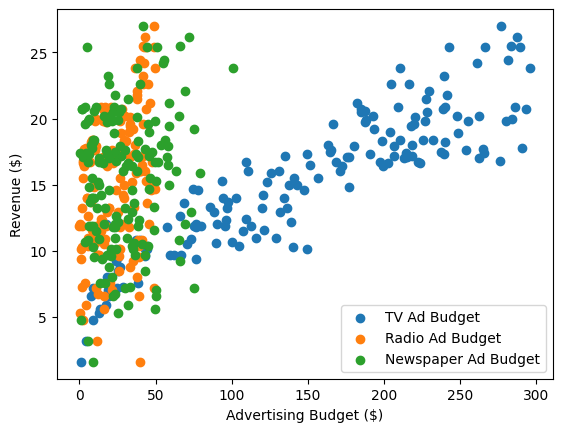

In [5]:
import matplotlib.pyplot as plt

plt.scatter(X_train['TV'], y_train, label='TV Ad Budget')
plt.scatter(X_train['Radio'], y_train, label='Radio Ad Budget')
plt.scatter(X_train['Newspaper'], y_train, label='Newspaper Ad Budget')
plt.xlabel('Advertising Budget ($)')
plt.ylabel('Revenue ($)')
plt.legend()
plt.show()

In [6]:
from sklearn.linear_model import LinearRegression

regModel = LinearRegression().fit(X_train['TV'].values.reshape(-1,1), y_train)

print(regModel.score(X_train['TV'].values.reshape(-1,1), y_train))


0.8134866044709264


Su valor está en el rango:

R²=1: El modelo predice perfectamente los valores observados.

R²=0: El modelo no mejora nada respecto a predecir la media de los datos.

R²<0: El modelo es peor que una predicción constante con la media (mala generalización).

R²=1− Suma de los errores al cuadrado (SSR)​ / Suma total de cuadrados (SST) 

In [9]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# Preparar los datos
X_tv = X_train['TV'].values.reshape(-1, 1)


# Entrenar el modelo con parámetros por defecto (potencial overfitting)
rf_model = RandomForestRegressor(
    n_estimators=1800,      # muchos árboles
    max_depth=None,        # sin límite de profundidad
    random_state=42
)

rf_model.fit(X_tv, y_train)

# Evaluar en entrenamiento y prueba
r2_train = rf_model.score(X_tv, y_train)

print("R² en entrenamiento:", r2_train)



R² en entrenamiento: 0.9574168463645423


In [10]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score

# Preparar los datos (convertir la columna 'TV' en 2D)
X_tv = X_train['TV'].values.reshape(-1, 1)

# Definir el modelo base
rf = RandomForestRegressor(random_state=42)

# Definir un grid de hiperparámetros pequeño
param_grid = {
    'n_estimators': [50, 100],           # número de árboles
    'max_depth': [None, 3, 5],           # profundidad máxima del árbol
    'min_samples_split': [2, 5]          # mínimo de muestras para dividir un nodo
}

# Configurar GridSearchCV
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,                   # validación cruzada de 5 particiones
    scoring='r2',           # usar R² como métrica de evaluación
    n_jobs=-1               # usar todos los núcleos disponibles
)

# Entrenar el modelo
grid_search.fit(X_tv, y_train)

# Imprimir los mejores hiperparámetros
print("Mejores hiperparámetros:", grid_search.best_params_)

# Evaluar el mejor modelo encontrado
best_model_rf = grid_search.best_estimator_
r2 = best_model_rf.score(X_tv, y_train)
print("R² en entrenamiento:", r2)


Mejores hiperparámetros: {'max_depth': 3, 'min_samples_split': 5, 'n_estimators': 100}
R² en entrenamiento: 0.8597905543254059


## Los modelos deben evaluarse en un conjunto de datos independiente del entrenamiento

In [12]:
Xtest_tv = X_test['TV'].values.reshape(-1, 1)

r2SLR = regModel.score(Xtest_tv, y_test)
print("R² en Testeo con SLR: ", r2SLR)


r2RFWihtoutGS = rf_model.score(Xtest_tv, y_test)
print("R² en Testeo con RF sin Grid Search: ", r2RFWihtoutGS)

r2RF = best_model_rf.score(Xtest_tv, y_test)
print("R² en Testeo con RF: ", r2RF)


R² en Testeo con SLR:  0.802561303423698
R² en Testeo con RF sin Grid Search:  0.8355363370347242
R² en Testeo con RF:  0.8324007395754048


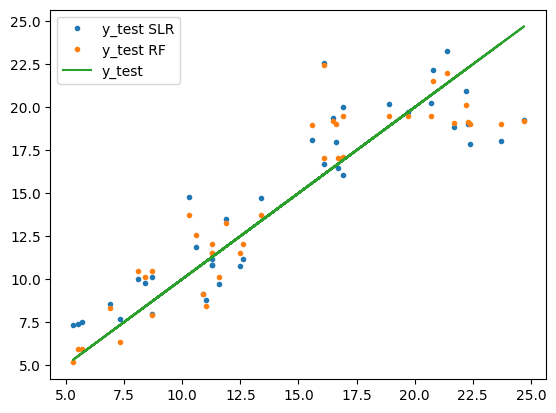

In [52]:
plt.figure()
plt.plot(y_test,regModel.predict(Xtest_tv),'.', label="y_test SLR")
plt.plot(y_test ,best_model_rf.predict(Xtest_tv), '.', label="y_test RF")
plt.plot(y_test, y_test,label='y_test')
plt.legend()

### Ejercicios 

Analizar el rendimiento que se puede obtener al utilizar otra u otras variables regresoras

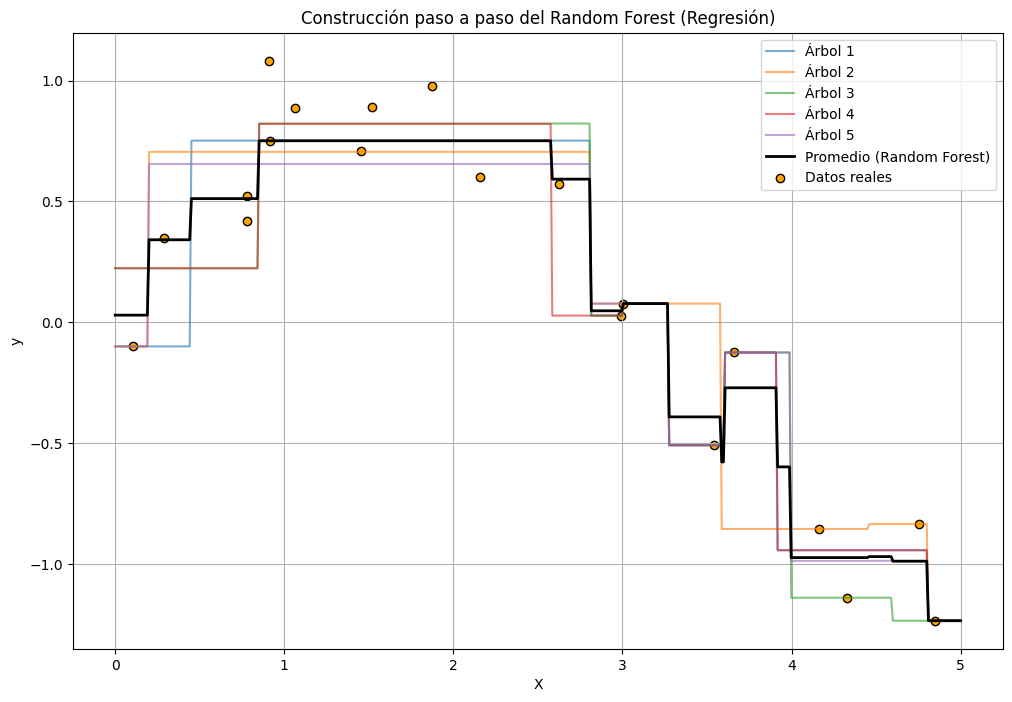

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor

# Crear datos artificiales
np.random.seed(42)
X = np.sort(5 * np.random.rand(20, 1), axis=0)
y = np.sin(X).ravel() + np.random.normal(0, 0.2, X.shape[0])

# Preparar datos para predecir
X_test = np.linspace(0, 5, 500).reshape(-1, 1)

# Crear varios árboles (simulación de Random Forest sin bootstrap)
n_trees = 5
predictions = []
trees = []

plt.figure(figsize=(12, 8))
for i in range(n_trees):
    # Simular aleatoriedad: submuestreo (sin reemplazo)
    idx = np.random.choice(len(X), size=int(0.8 * len(X)), replace=False)
    X_sample, y_sample = X[idx], y[idx]

    # Crear árbol de decisión simple
    tree = DecisionTreeRegressor(max_depth=3, random_state=i)
    tree.fit(X_sample, y_sample)
    trees.append(tree)

    # Predecir y graficar cada árbol
    y_tree_pred = tree.predict(X_test)
    predictions.append(y_tree_pred)
    plt.plot(X_test, y_tree_pred, label=f'Árbol {i+1}', alpha=0.6)

# Promedio de las predicciones de los árboles
y_avg = np.mean(predictions, axis=0)
plt.plot(X_test, y_avg, color='black', linewidth=2, label='Promedio (Random Forest)')

# Datos originales
plt.scatter(X, y, c='orange', edgecolor='k', label='Datos reales')

plt.title("Construcción paso a paso del Random Forest (Regresión)")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()
